In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
# Read the attrition csv file
attrition = pd.read_csv('data.csv')
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
attrition.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
attrition.shape

(1470, 35)

In [ ]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

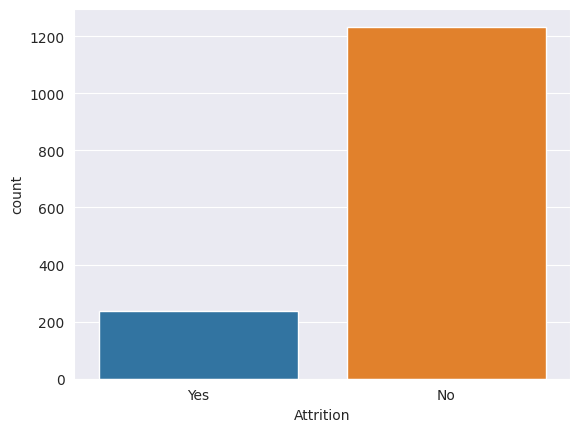

Attrition
No     0.838776
Yes    0.161224
dtype: float64


In [ ]:
# check if dataset is balanced
sns.set_style('darkgrid')
sns.countplot(data=attrition,x='Attrition')
plt.show()

size = attrition.groupby("Attrition").size()
percent = size/1470
print(percent)


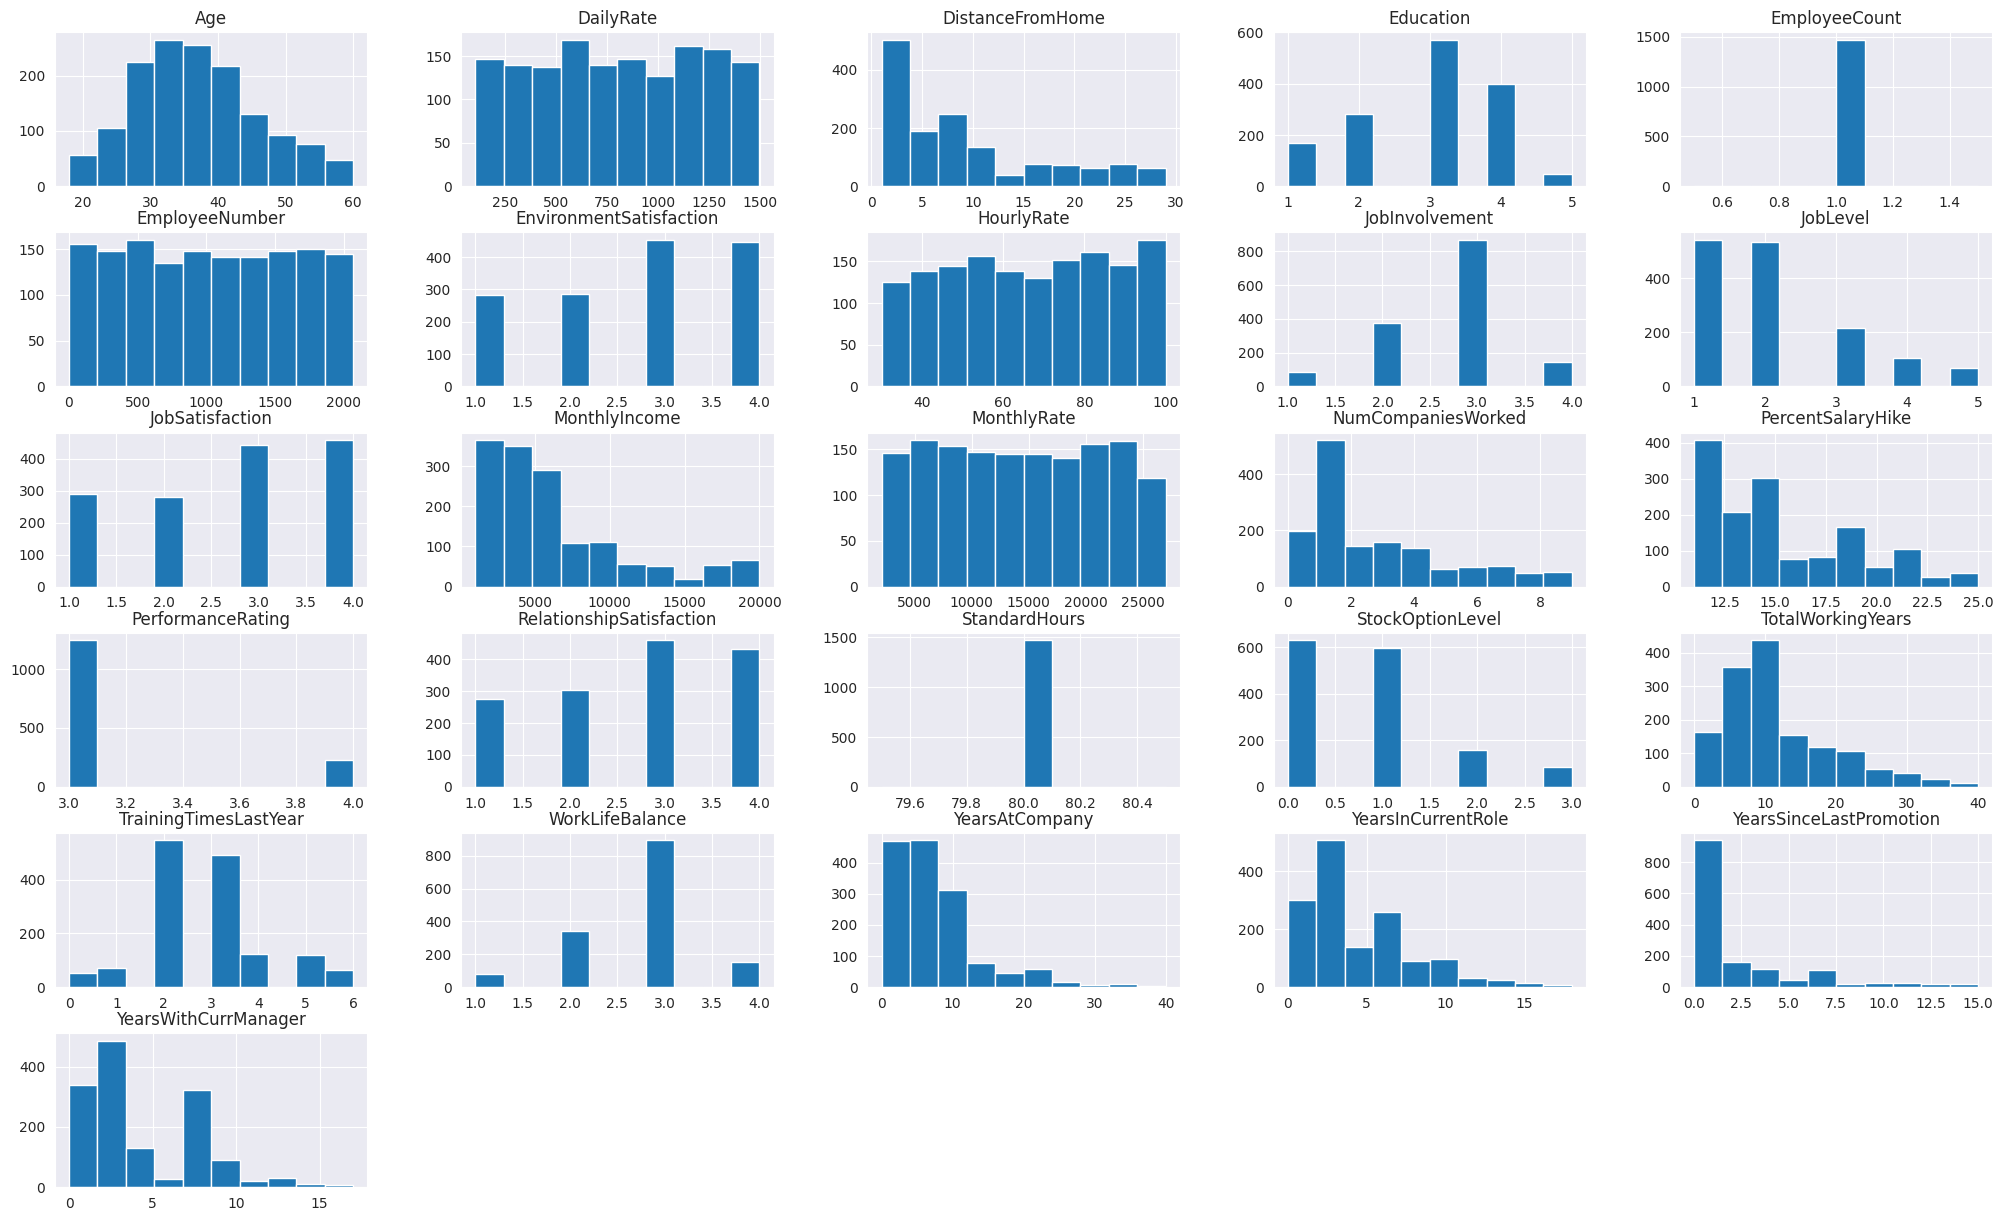

In [ ]:
#see distribution of all variables

attrition.hist(figsize=(25,15))
plt.show()

In [ ]:
print(attrition.StandardHours.value_counts())
print(attrition.EmployeeCount.value_counts())
print(attrition.EmployeeNumber.value_counts())


80    1470
Name: StandardHours, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64


In [ ]:
attrition = attrition.drop('StandardHours', axis=1)

In [ ]:
attrition = attrition.drop('EmployeeCount', axis=1)

In [ ]:
attrition = attrition.drop('EmployeeNumber', axis=1)

In [ ]:
attrition.shape

(1470, 32)

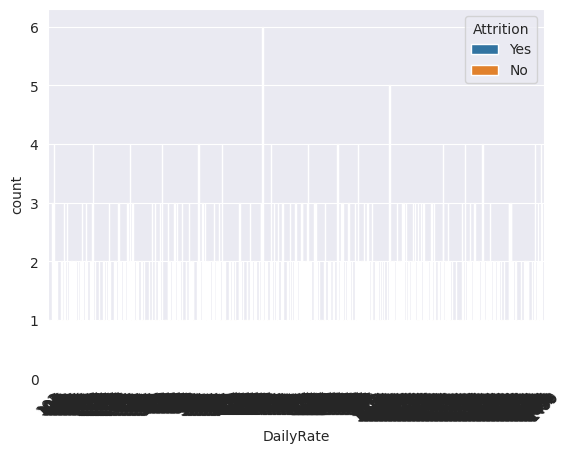

In [ ]:
#  check trends of whether daily rate is likely to influence resignation rates

sns.countplot(x = attrition['DailyRate'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

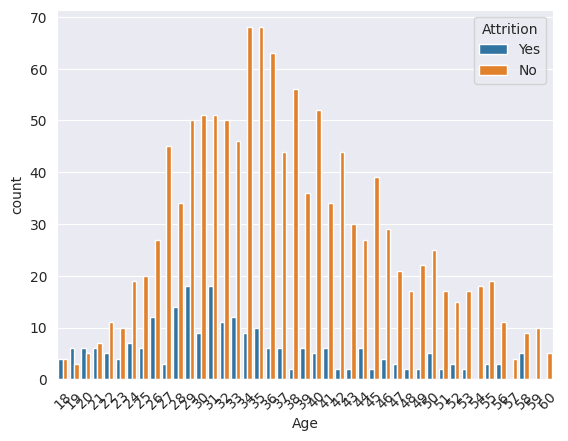

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
| 18 |            50      |            50       |
+----+--------------------+---------------------+
| 19 |            33.3333 |            66.6667  |
+----+--------------------+---------------------+
| 20 |            45.4545 |            54.5455  |
+----+--------------------+---------------------+
| 21 |            53.8462 |            46.1538  |
+----+--------------------+---------------------+
| 22 |            68.75   |            31.25    |
+----+--------------------+---------------------+
| 23 |            71.4286 |            28.5714  |
+----+--------------------+---------------------+
| 24 |            73.0769 |            26.9231  |
+----+--------------------+---------------------+
| 25 |            76.9231 |            23.0769  |
+----+--------------------+---------------------+
| 26 |            69.2308 |            30.7692  |


In [ ]:
#  check trends of whether any particular age group is more likely to quit

sns.countplot(x = attrition['Age'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='Age', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Age': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

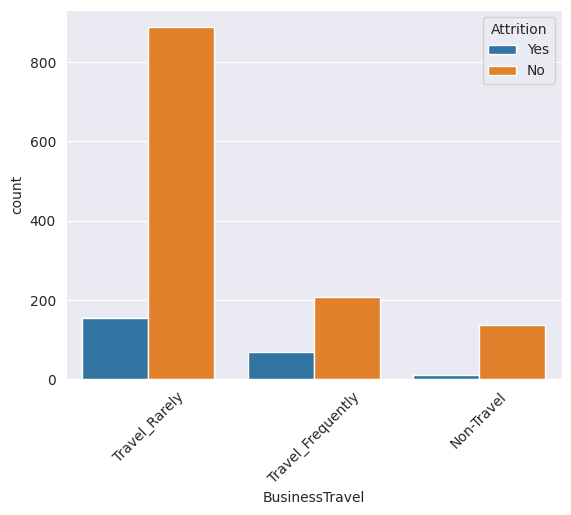

+-------------------+--------------------+---------------------+
| BusinessTravel    |   Percentage of No |   Percentage of Yes |
+===================+====================+=====================+
| Non-Travel        |            92      |              8      |
+-------------------+--------------------+---------------------+
| Travel_Frequently |            75.0903 |             24.9097 |
+-------------------+--------------------+---------------------+
| Travel_Rarely     |            85.0431 |             14.9569 |
+-------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether business travel is likely to influence resignation rates

sns.countplot(x = attrition['BusinessTravel'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='BusinessTravel', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Business travel': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

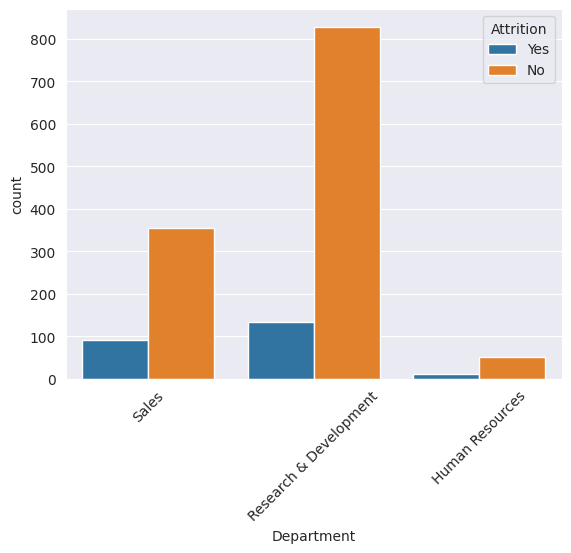

+------------------------+--------------------+---------------------+
|                        |   Percentage of No |   Percentage of Yes |
+========================+====================+=====================+
| Human Resources        |            80.9524 |             19.0476 |
+------------------------+--------------------+---------------------+
| Research & Development |            86.1602 |             13.8398 |
+------------------------+--------------------+---------------------+
| Sales                  |            79.3722 |             20.6278 |
+------------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether the department someone is in is likely to influence resignation rates

sns.countplot(x = attrition['Department'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='Department', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Department': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

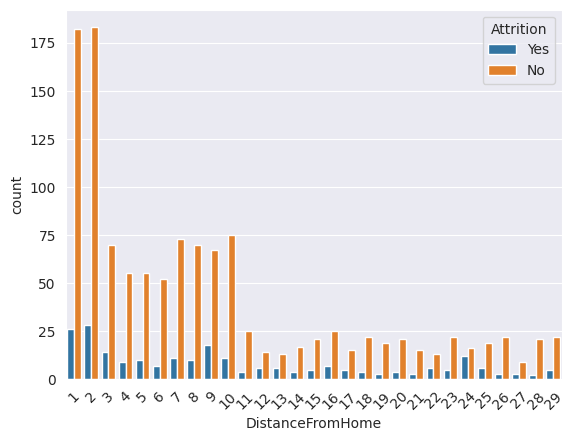

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  1 |            87.5    |            12.5     |
+----+--------------------+---------------------+
|  2 |            86.7299 |            13.2701  |
+----+--------------------+---------------------+
|  3 |            83.3333 |            16.6667  |
+----+--------------------+---------------------+
|  4 |            85.9375 |            14.0625  |
+----+--------------------+---------------------+
|  5 |            84.6154 |            15.3846  |
+----+--------------------+---------------------+
|  6 |            88.1356 |            11.8644  |
+----+--------------------+---------------------+
|  7 |            86.9048 |            13.0952  |
+----+--------------------+---------------------+
|  8 |            87.5    |            12.5     |
+----+--------------------+---------------------+
|  9 |            78.8235 |            21.1765  |


In [ ]:
#  check trends of whether the distance of the workplace from home is likely to influence resignation rates

sns.countplot(x = attrition['DistanceFromHome'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='DistanceFromHome', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'DistanceFromHome': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

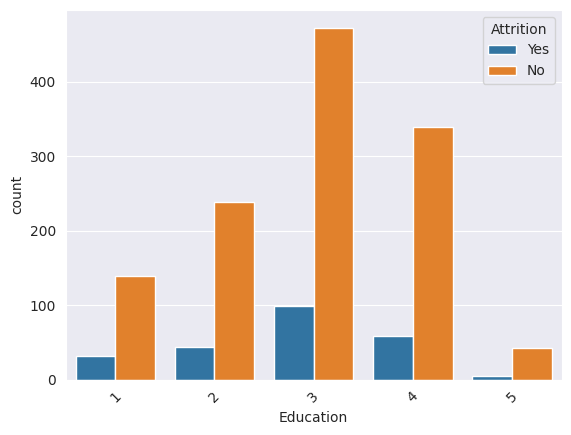

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  1 |            81.7647 |             18.2353 |
+----+--------------------+---------------------+
|  2 |            84.3972 |             15.6028 |
+----+--------------------+---------------------+
|  3 |            82.6923 |             17.3077 |
+----+--------------------+---------------------+
|  4 |            85.4271 |             14.5729 |
+----+--------------------+---------------------+
|  5 |            89.5833 |             10.4167 |
+----+--------------------+---------------------+


In [ ]:
#  check trends of whether education level is likely to influence resignation rates

sns.countplot(x = attrition['Education'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='Education', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Education': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

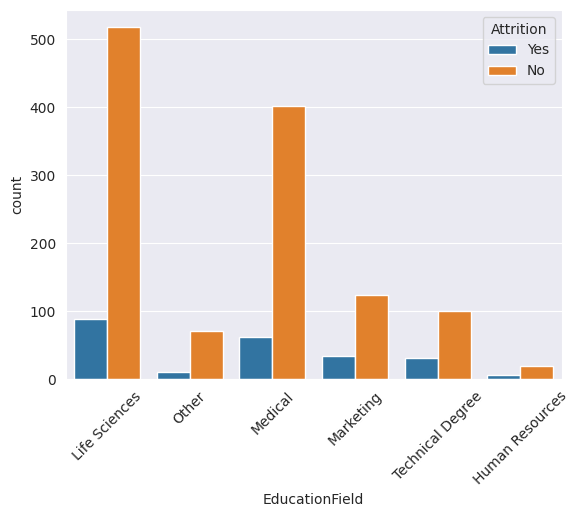

+------------------+--------------------+---------------------+
|                  |   Percentage of No |   Percentage of Yes |
+==================+====================+=====================+
| Human Resources  |            74.0741 |             25.9259 |
+------------------+--------------------+---------------------+
| Life Sciences    |            85.3135 |             14.6865 |
+------------------+--------------------+---------------------+
| Marketing        |            77.9874 |             22.0126 |
+------------------+--------------------+---------------------+
| Medical          |            86.4224 |             13.5776 |
+------------------+--------------------+---------------------+
| Other            |            86.5854 |             13.4146 |
+------------------+--------------------+---------------------+
| Technical Degree |            75.7576 |             24.2424 |
+------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether education field is likely to influence resignation rates

sns.countplot(x = attrition['EducationField'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='EducationField', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'EducationField': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)


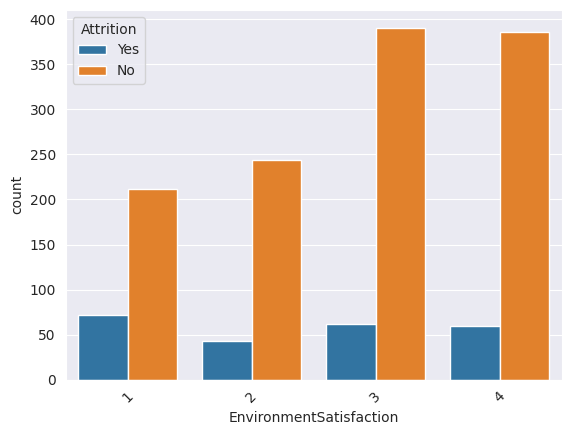

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  1 |            74.6479 |             25.3521 |
+----+--------------------+---------------------+
|  2 |            85.0174 |             14.9826 |
+----+--------------------+---------------------+
|  3 |            86.3135 |             13.6865 |
+----+--------------------+---------------------+
|  4 |            86.5471 |             13.4529 |
+----+--------------------+---------------------+


In [ ]:
#  check trends of whether satisfacton with the environment is likely to influence resignation rates

sns.countplot(x = attrition['EnvironmentSatisfaction'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='EnvironmentSatisfaction', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'EnvironmentSatisfaction': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

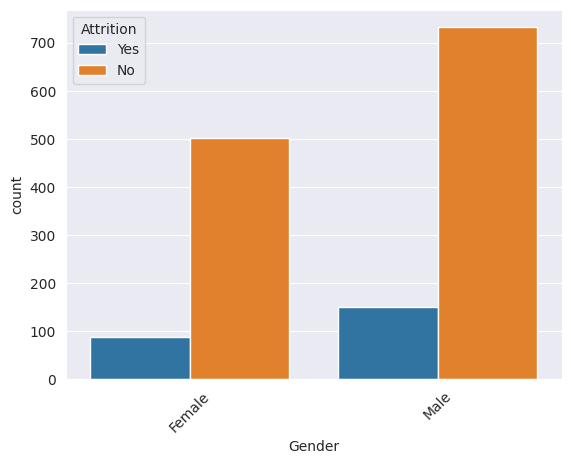

+--------+--------------------+---------------------+
|        |   Percentage of No |   Percentage of Yes |
+========+====================+=====================+
| Female |            85.2041 |             14.7959 |
+--------+--------------------+---------------------+
| Male   |            82.9932 |             17.0068 |
+--------+--------------------+---------------------+


In [ ]:
#  check trends of whether gender is likely to influence resignation rates

sns.countplot(x = attrition['Gender'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='Gender', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Gender': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)


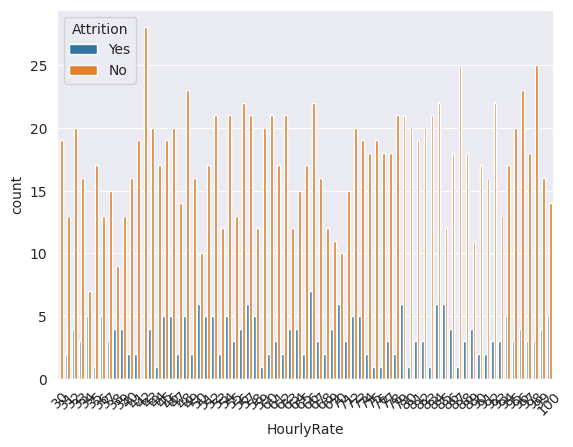

In [ ]:
#  check trends of whether hourly rates is likely to influence resignation rates

sns.countplot(x = attrition['HourlyRate'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

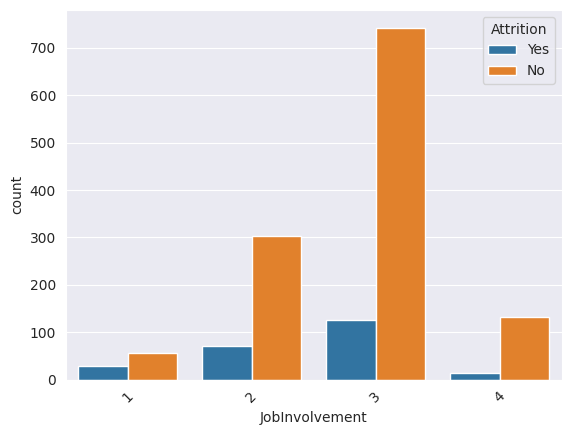

+------------------+--------------------+---------------------+
|   JobInvolvement |   Percentage of No |   Percentage of Yes |
+==================+====================+=====================+
|                1 |            66.2651 |            33.7349  |
+------------------+--------------------+---------------------+
|                2 |            81.0667 |            18.9333  |
+------------------+--------------------+---------------------+
|                3 |            85.5991 |            14.4009  |
+------------------+--------------------+---------------------+
|                4 |            90.9722 |             9.02778 |
+------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether level of job involvement is likely to influence resignation rates

sns.countplot(x = attrition['JobInvolvement'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='JobInvolvement', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Job Involvement': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

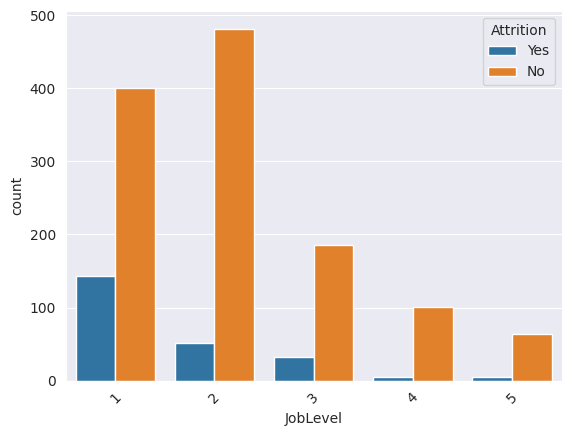

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  1 |            73.6648 |            26.3352  |
+----+--------------------+---------------------+
|  2 |            90.2622 |             9.73783 |
+----+--------------------+---------------------+
|  3 |            85.3211 |            14.6789  |
+----+--------------------+---------------------+
|  4 |            95.283  |             4.71698 |
+----+--------------------+---------------------+
|  5 |            92.7536 |             7.24638 |
+----+--------------------+---------------------+


In [ ]:
#  check trends of whether job level is likely to influence resignation rates

sns.countplot(x = attrition['JobLevel'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='JobLevel', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'JobLevel': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

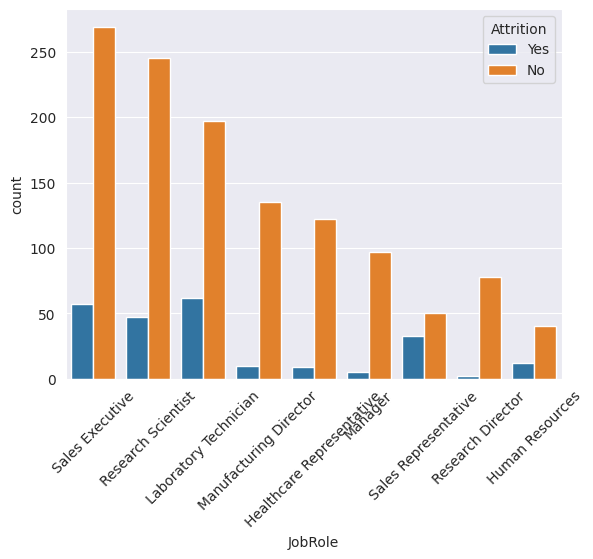

+---------------------------+--------------------+---------------------+
| JobRole                   |   Percentage of No |   Percentage of Yes |
+===========================+====================+=====================+
| Healthcare Representative |            93.1298 |             6.87023 |
+---------------------------+--------------------+---------------------+
| Human Resources           |            76.9231 |            23.0769  |
+---------------------------+--------------------+---------------------+
| Laboratory Technician     |            76.0618 |            23.9382  |
+---------------------------+--------------------+---------------------+
| Manager                   |            95.098  |             4.90196 |
+---------------------------+--------------------+---------------------+
| Manufacturing Director    |            93.1034 |             6.89655 |
+---------------------------+--------------------+---------------------+
| Research Director         |            97.5    | 

In [ ]:
#  check trends of whether the job role is likely to influence resignation rates

sns.countplot(x = attrition['JobRole'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='JobRole', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Job Role': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

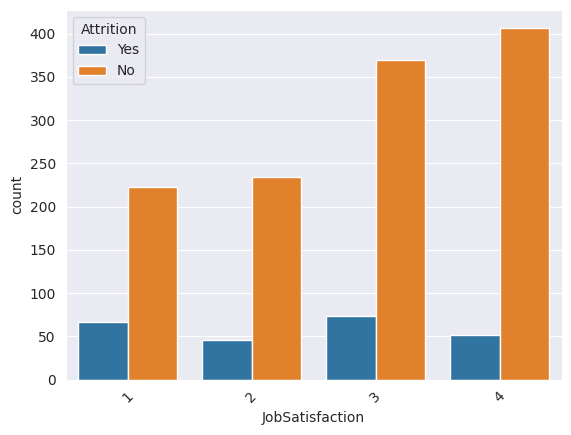

+-------------------+--------------------+---------------------+
|   JobSatisfaction |   Percentage of No |   Percentage of Yes |
+===================+====================+=====================+
|                 1 |            77.1626 |             22.8374 |
+-------------------+--------------------+---------------------+
|                 2 |            83.5714 |             16.4286 |
+-------------------+--------------------+---------------------+
|                 3 |            83.4842 |             16.5158 |
+-------------------+--------------------+---------------------+
|                 4 |            88.671  |             11.329  |
+-------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether job satisfaction is likely to influence resignation rates

sns.countplot(x = attrition['JobSatisfaction'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='JobSatisfaction', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Job Satisfaction': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

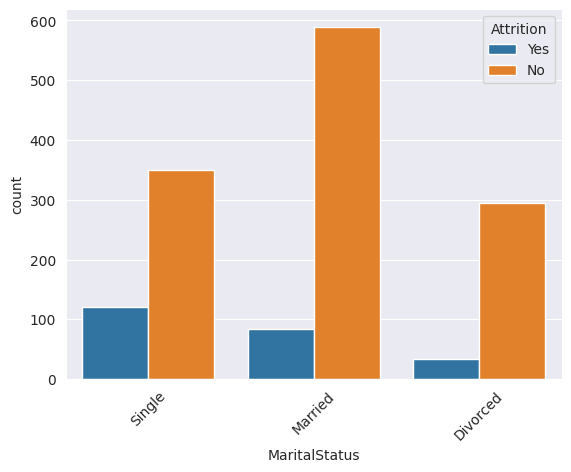

+-----------------+--------------------+---------------------+
| MaritalStatus   |   Percentage of No |   Percentage of Yes |
+=================+====================+=====================+
| Divorced        |            89.9083 |             10.0917 |
+-----------------+--------------------+---------------------+
| Married         |            87.5186 |             12.4814 |
+-----------------+--------------------+---------------------+
| Single          |            74.4681 |             25.5319 |
+-----------------+--------------------+---------------------+


In [ ]:
#  check trends of whether being married is likely to influence resignation rates

sns.countplot(x = attrition['MaritalStatus'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='MaritalStatus', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Marital Status': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

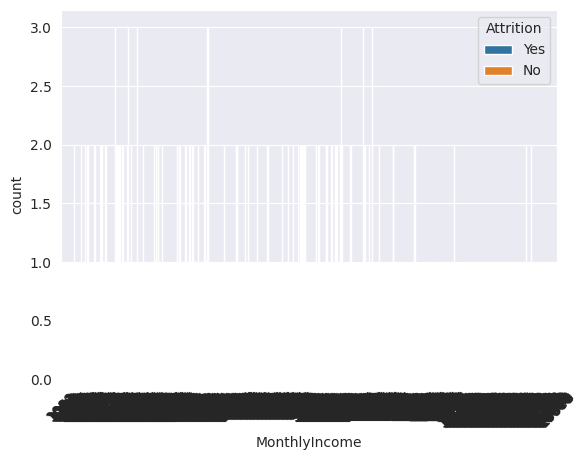

In [ ]:
#  check trends of whether monthly income is likely to influence resignation rates

sns.countplot(x = attrition['MonthlyIncome'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

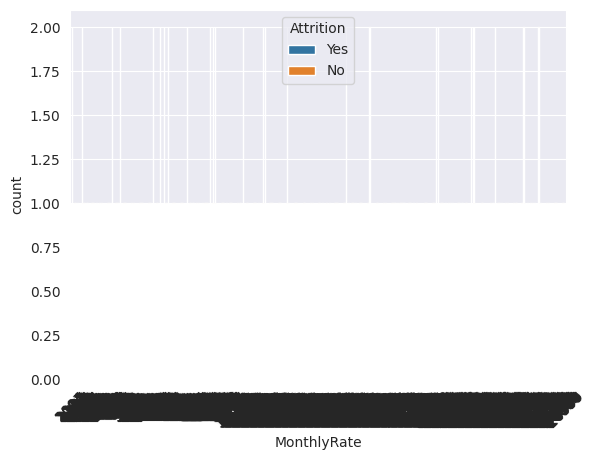

In [ ]:
#  check trends of whether monthly rate is likely to influence resignation rates

sns.countplot(x = attrition['MonthlyRate'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

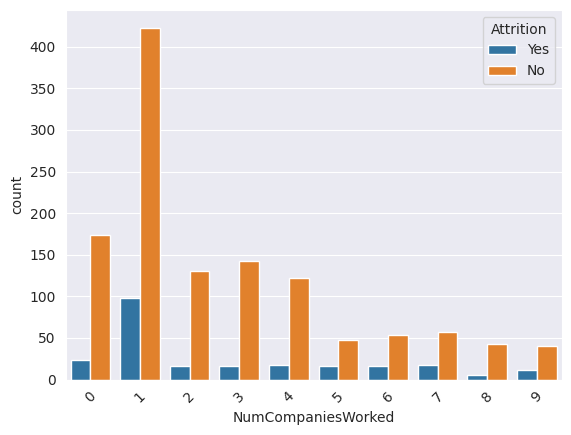

+----------------------+--------------------+---------------------+
|   NumCompaniesWorked |   Percentage of No |   Percentage of Yes |
+======================+====================+=====================+
|                    0 |            88.3249 |             11.6751 |
+----------------------+--------------------+---------------------+
|                    1 |            81.19   |             18.81   |
+----------------------+--------------------+---------------------+
|                    2 |            89.0411 |             10.9589 |
+----------------------+--------------------+---------------------+
|                    3 |            89.9371 |             10.0629 |
+----------------------+--------------------+---------------------+
|                    4 |            87.7698 |             12.2302 |
+----------------------+--------------------+---------------------+
|                    5 |            74.6032 |             25.3968 |
+----------------------+--------------------+---

In [ ]:
#  check trends of whether having worked in other companies is likely to influence resignation rates

sns.countplot(x = attrition['NumCompaniesWorked'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='NumCompaniesWorked', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Number of Companies Worked': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

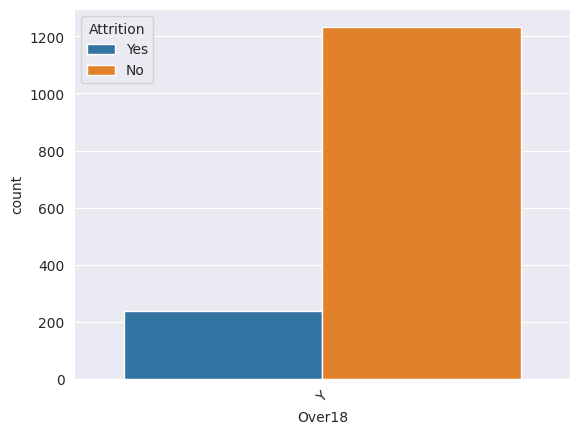

+----------+--------------------+---------------------+
| Over18   |   Percentage of No |   Percentage of Yes |
+==========+====================+=====================+
| Y        |            83.8776 |             16.1224 |
+----------+--------------------+---------------------+


In [ ]:
#  check trends of whether being above 18 is likely to influence resignation rates

sns.countplot(x = attrition['Over18'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='Over18', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Over 18': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

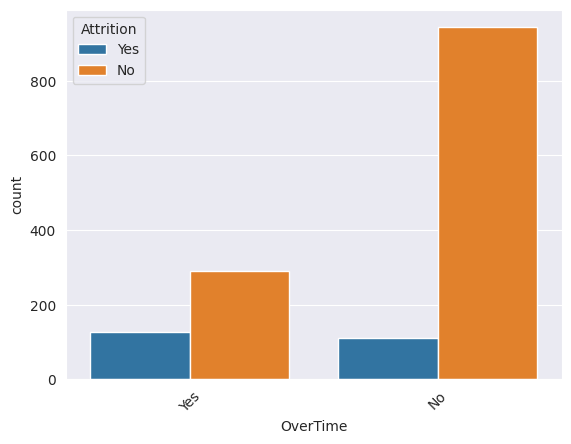

+------------+--------------------+---------------------+
| OverTime   |   Percentage of No |   Percentage of Yes |
+============+====================+=====================+
| No         |            89.5636 |             10.4364 |
+------------+--------------------+---------------------+
| Yes        |            69.4712 |             30.5288 |
+------------+--------------------+---------------------+


In [ ]:
#  check trends of whether being required to work overtime is likely to influence resignation rates

sns.countplot(x = attrition['OverTime'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='OverTime', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Over Time': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

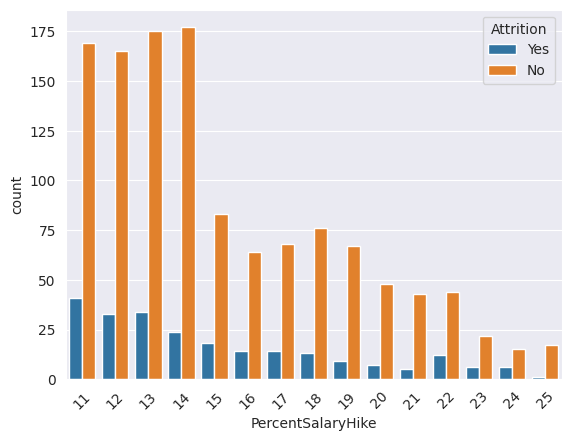

+---------------------+--------------------+---------------------+
|   PercentSalaryHike |   Percentage of No |   Percentage of Yes |
+=====================+====================+=====================+
|                  11 |            80.4762 |            19.5238  |
+---------------------+--------------------+---------------------+
|                  12 |            83.3333 |            16.6667  |
+---------------------+--------------------+---------------------+
|                  13 |            83.7321 |            16.2679  |
+---------------------+--------------------+---------------------+
|                  14 |            88.0597 |            11.9403  |
+---------------------+--------------------+---------------------+
|                  15 |            82.1782 |            17.8218  |
+---------------------+--------------------+---------------------+
|                  16 |            82.0513 |            17.9487  |
+---------------------+--------------------+------------------

In [ ]:


#  check trends of whether geting a good salary hike is likely to influence resignation rates

sns.countplot(x = attrition['PercentSalaryHike'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='PercentSalaryHike', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Percent Salary Hike': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)


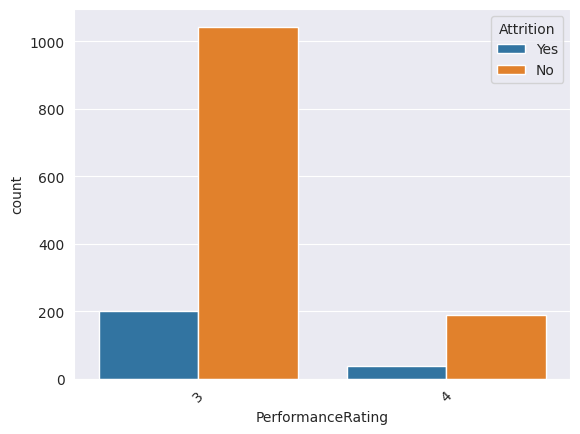

+---------------------+--------------------+---------------------+
|   PerformanceRating |   Percentage of No |   Percentage of Yes |
+=====================+====================+=====================+
|                   3 |            83.9228 |             16.0772 |
+---------------------+--------------------+---------------------+
|                   4 |            83.6283 |             16.3717 |
+---------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether performance rating is likely to influence resignation rates

sns.countplot(x = attrition['PerformanceRating'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='PerformanceRating', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Performance Rating': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

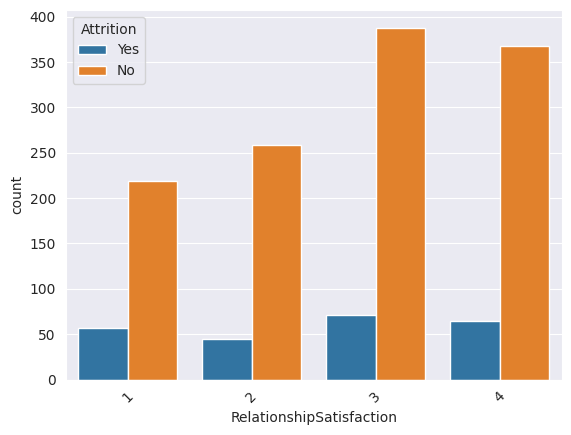

+----------------------------+--------------------+---------------------+
|   RelationshipSatisfaction |   Percentage of No |   Percentage of Yes |
+============================+====================+=====================+
|                          1 |            79.3478 |             20.6522 |
+----------------------------+--------------------+---------------------+
|                          2 |            85.1485 |             14.8515 |
+----------------------------+--------------------+---------------------+
|                          3 |            84.5316 |             15.4684 |
+----------------------------+--------------------+---------------------+
|                          4 |            85.1852 |             14.8148 |
+----------------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether relationship satisfaction is likely to influence resignation rates

sns.countplot(x = attrition['RelationshipSatisfaction'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='RelationshipSatisfaction', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Relationship Satisfaction': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

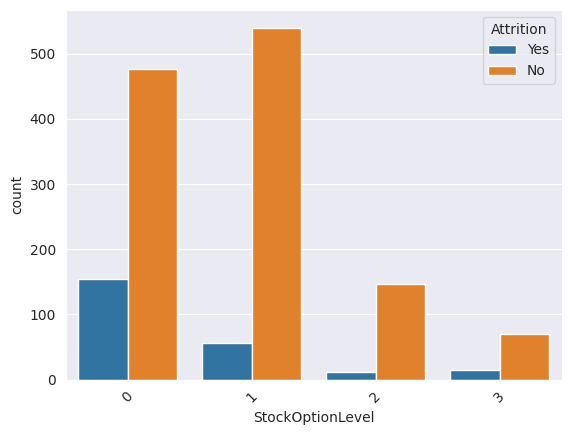

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  0 |            75.5943 |            24.4057  |
+----+--------------------+---------------------+
|  1 |            90.604  |             9.39597 |
+----+--------------------+---------------------+
|  2 |            92.4051 |             7.59494 |
+----+--------------------+---------------------+
|  3 |            82.3529 |            17.6471  |
+----+--------------------+---------------------+


In [ ]:
#  check trends of whether stock option level is likely to influence resignation rates

sns.countplot(x = attrition['StockOptionLevel'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='StockOptionLevel', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'StockOptionLevel': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

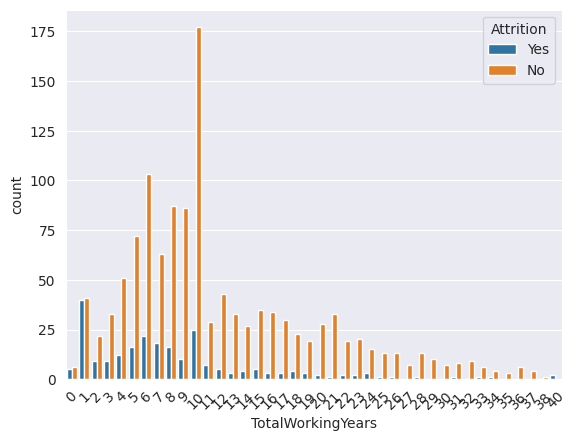

+---------------------+--------------------+---------------------+
|   TotalWorkingYears |   Percentage of No |   Percentage of Yes |
+=====================+====================+=====================+
|                   0 |            54.5455 |            45.4545  |
+---------------------+--------------------+---------------------+
|                   1 |            50.6173 |            49.3827  |
+---------------------+--------------------+---------------------+
|                   2 |            70.9677 |            29.0323  |
+---------------------+--------------------+---------------------+
|                   3 |            78.5714 |            21.4286  |
+---------------------+--------------------+---------------------+
|                   4 |            80.9524 |            19.0476  |
+---------------------+--------------------+---------------------+
|                   5 |            81.8182 |            18.1818  |
+---------------------+--------------------+------------------

In [ ]:
#  check trends of whether total working years is likely to influence resignation rates

sns.countplot(x = attrition['TotalWorkingYears'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='TotalWorkingYears', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Total Working Years': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

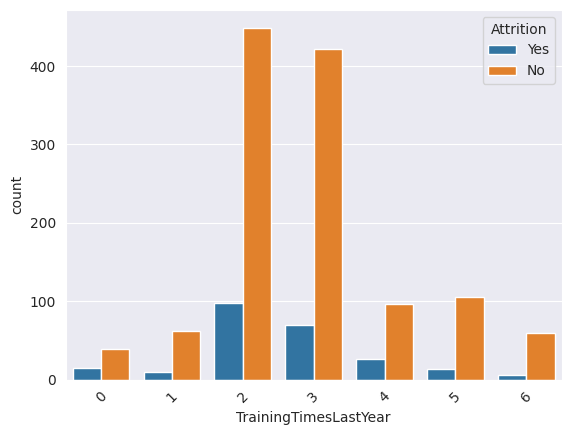

+-------------------------+--------------------+---------------------+
|   TrainingTimesLastYear |   Percentage of No |   Percentage of Yes |
+=========================+====================+=====================+
|                       0 |            72.2222 |            27.7778  |
+-------------------------+--------------------+---------------------+
|                       1 |            87.3239 |            12.6761  |
+-------------------------+--------------------+---------------------+
|                       2 |            82.0841 |            17.9159  |
+-------------------------+--------------------+---------------------+
|                       3 |            85.947  |            14.053   |
+-------------------------+--------------------+---------------------+
|                       4 |            78.8618 |            21.1382  |
+-------------------------+--------------------+---------------------+
|                       5 |            88.2353 |            11.7647  |
+-----

In [ ]:
#  check trends of whether training is likely to influence resignation rates

sns.countplot(x = attrition['TrainingTimesLastYear'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='TrainingTimesLastYear', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Training Times Last Year': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

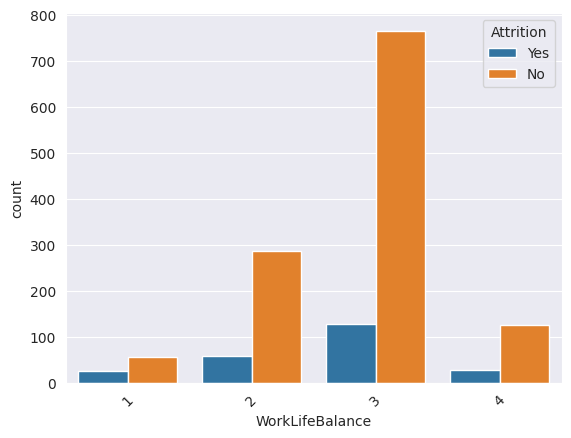

+-------------------+--------------------+---------------------+
|   WorkLifeBalance |   Percentage of No |   Percentage of Yes |
+===================+====================+=====================+
|                 1 |            68.75   |             31.25   |
+-------------------+--------------------+---------------------+
|                 2 |            83.1395 |             16.8605 |
+-------------------+--------------------+---------------------+
|                 3 |            85.7783 |             14.2217 |
+-------------------+--------------------+---------------------+
|                 4 |            82.3529 |             17.6471 |
+-------------------+--------------------+---------------------+


In [ ]:
#  check trends of whether work life balance is likely to influence resignation rates

sns.countplot(x = attrition['WorkLifeBalance'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='WorkLifeBalance', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Work life balance': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

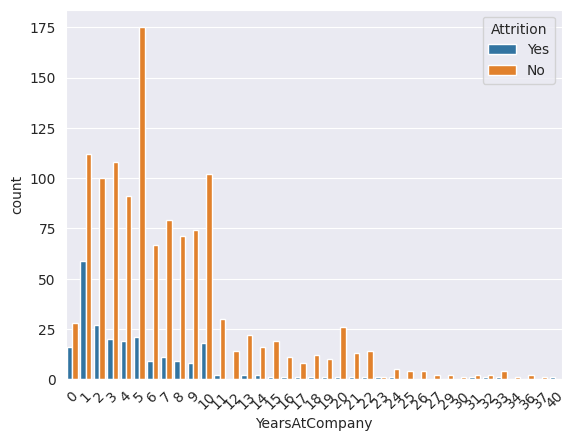

+------------------+--------------------+---------------------+
|   YearsAtCompany |   Percentage of No |   Percentage of Yes |
+==================+====================+=====================+
|                0 |            63.6364 |            36.3636  |
+------------------+--------------------+---------------------+
|                1 |            65.4971 |            34.5029  |
+------------------+--------------------+---------------------+
|                2 |            78.7402 |            21.2598  |
+------------------+--------------------+---------------------+
|                3 |            84.375  |            15.625   |
+------------------+--------------------+---------------------+
|                4 |            82.7273 |            17.2727  |
+------------------+--------------------+---------------------+
|                5 |            89.2857 |            10.7143  |
+------------------+--------------------+---------------------+
|                6 |            88.1579 

In [ ]:
#  check trends of whether years at company is likely to influence resignation rates

sns.countplot(x = attrition['YearsAtCompany'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='YearsAtCompany', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'Years at Company': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

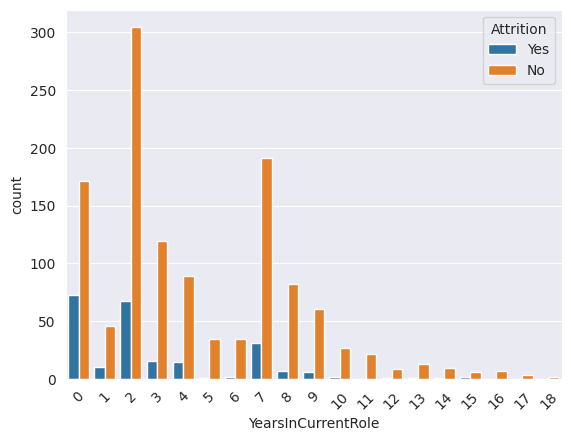

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  0 |            70.082  |            29.918   |
+----+--------------------+---------------------+
|  1 |            80.7018 |            19.2982  |
+----+--------------------+---------------------+
|  2 |            81.7204 |            18.2796  |
+----+--------------------+---------------------+
|  3 |            88.1481 |            11.8519  |
+----+--------------------+---------------------+
|  4 |            85.5769 |            14.4231  |
+----+--------------------+---------------------+
|  5 |            97.2222 |             2.77778 |
+----+--------------------+---------------------+
|  6 |            94.5946 |             5.40541 |
+----+--------------------+---------------------+
|  7 |            86.036  |            13.964   |
+----+--------------------+---------------------+
|  8 |            92.1348 |             7.86517 |


In [ ]:
#  check trends of whether years in current role is likely to influence resignation rates

sns.countplot(x = attrition['YearsInCurrentRole'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='YearsInCurrentRole', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'YearsInCurrentRole': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

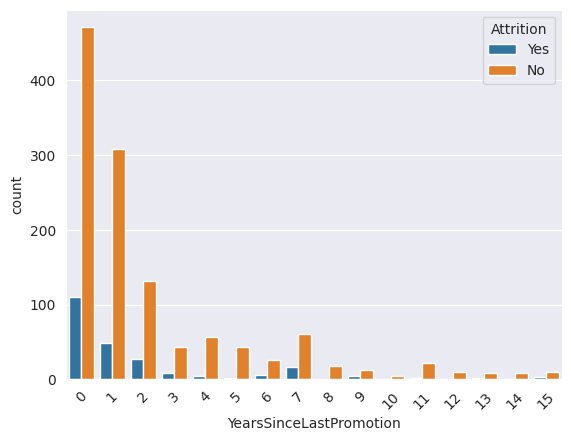

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  0 |            81.0671 |            18.9329  |
+----+--------------------+---------------------+
|  1 |            86.2745 |            13.7255  |
+----+--------------------+---------------------+
|  2 |            83.0189 |            16.9811  |
+----+--------------------+---------------------+
|  3 |            82.6923 |            17.3077  |
+----+--------------------+---------------------+
|  4 |            91.8033 |             8.19672 |
+----+--------------------+---------------------+
|  5 |            95.5556 |             4.44444 |
+----+--------------------+---------------------+
|  6 |            81.25   |            18.75    |
+----+--------------------+---------------------+
|  7 |            78.9474 |            21.0526  |
+----+--------------------+---------------------+
|  8 |           100      |             0       |


In [ ]:
#  check trends of whether years since last promotion is likely to influence resignation rates

sns.countplot(x = attrition['YearsSinceLastPromotion'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='YearsSinceLastPromotion', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'YearsSinceLastPromotion': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

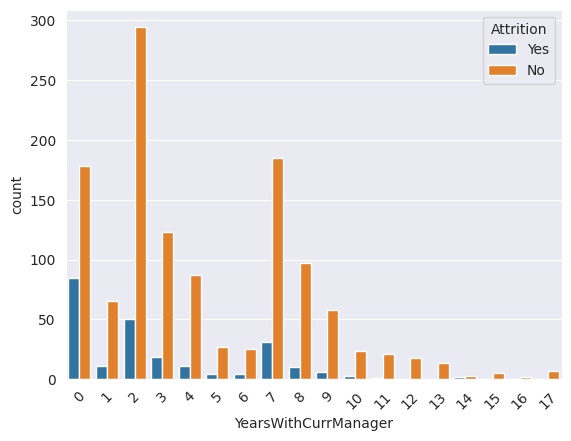

+----+--------------------+---------------------+
|    |   Percentage of No |   Percentage of Yes |
+====+====================+=====================+
|  0 |            67.6806 |            32.3194  |
+----+--------------------+---------------------+
|  1 |            85.5263 |            14.4737  |
+----+--------------------+---------------------+
|  2 |            85.4651 |            14.5349  |
+----+--------------------+---------------------+
|  3 |            86.6197 |            13.3803  |
+----+--------------------+---------------------+
|  4 |            88.7755 |            11.2245  |
+----+--------------------+---------------------+
|  5 |            87.0968 |            12.9032  |
+----+--------------------+---------------------+
|  6 |            86.2069 |            13.7931  |
+----+--------------------+---------------------+
|  7 |            85.6481 |            14.3519  |
+----+--------------------+---------------------+
|  8 |            90.6542 |             9.34579 |


In [ ]:
#  check trends of whether years with current manager is likely to influence resignation rates

sns.countplot(x = attrition['YearsWithCurrManager'],hue=attrition['Attrition'])
plt.xticks(rotation=45)
plt.show()

pivot_table = attrition.pivot_table(index='YearsWithCurrManager', columns='Attrition', aggfunc='size', fill_value=0)

total = pivot_table.sum(axis=1)
percentages = (pivot_table.div(total, axis=0) * 100).reset_index()

percentages.rename(columns={'YearsWithCurrManager': '', 'No': 'Percentage of No', 'Yes': 'Percentage of Yes'}, inplace=True)

table = tabulate(percentages, headers='keys', tablefmt='grid', showindex=False)

print(table)

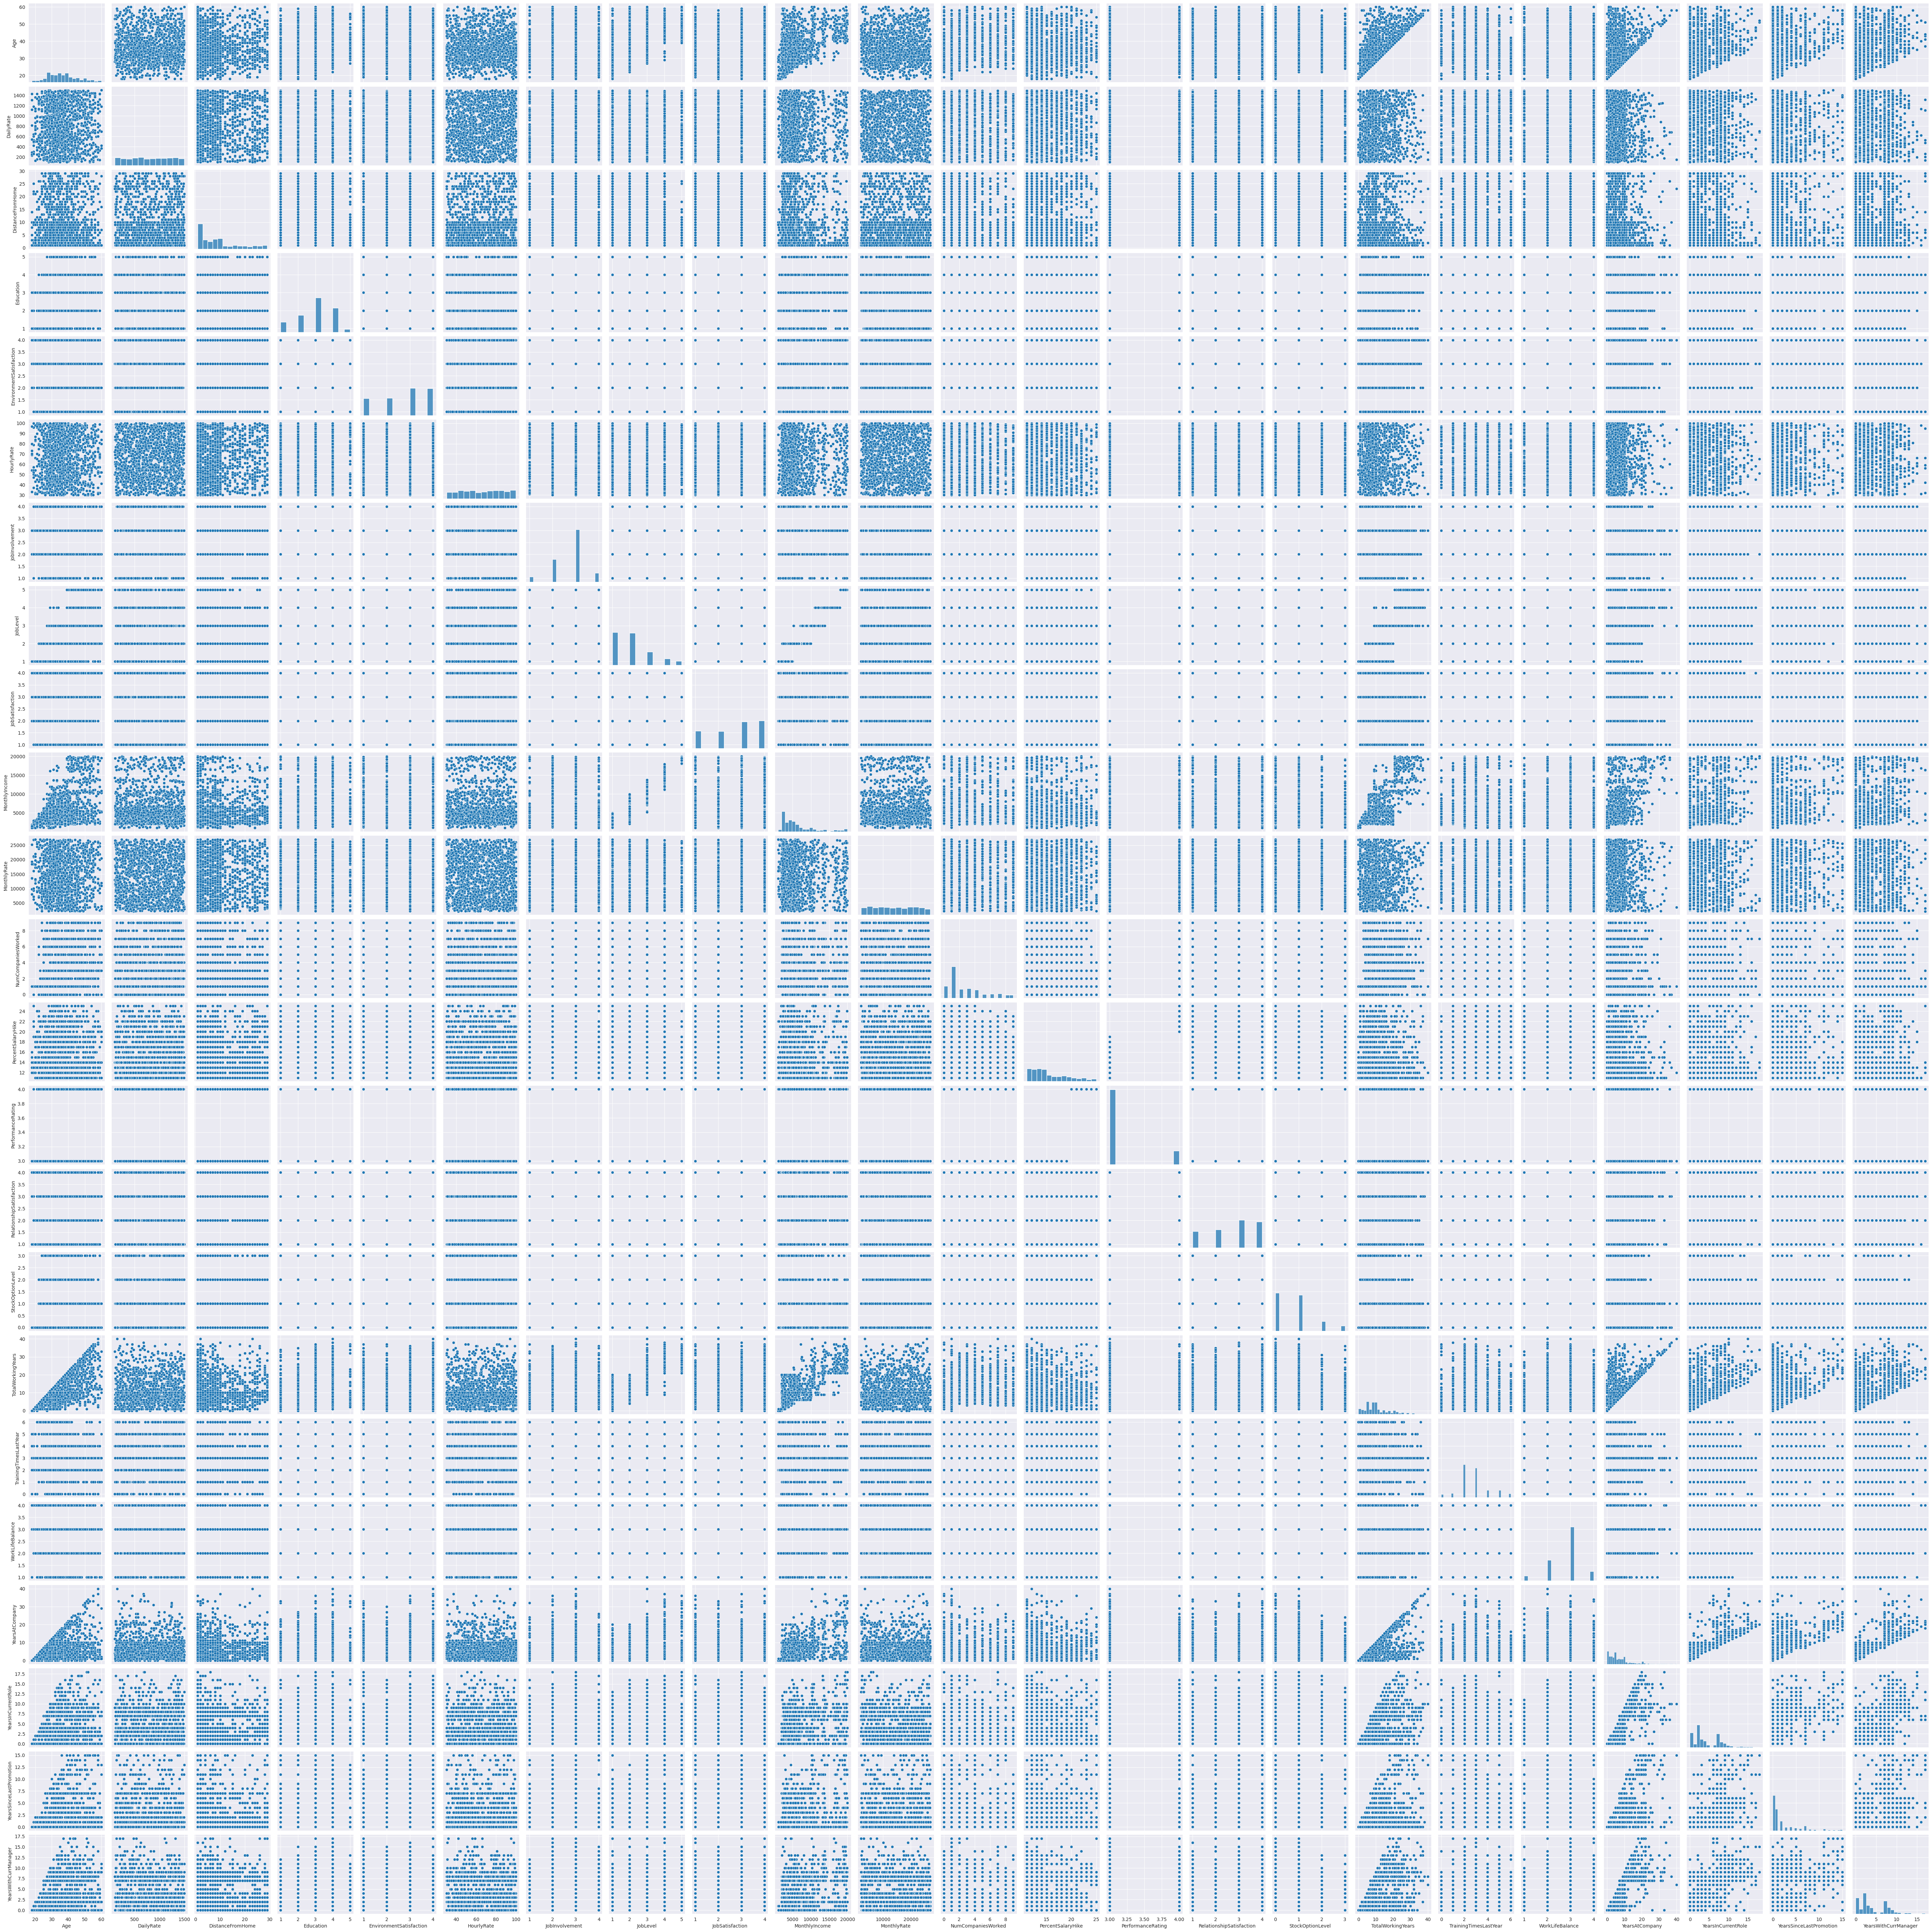

In [ ]:
sns.pairplot(attrition)

Attrition
No     [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
Yes    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
dtype: object

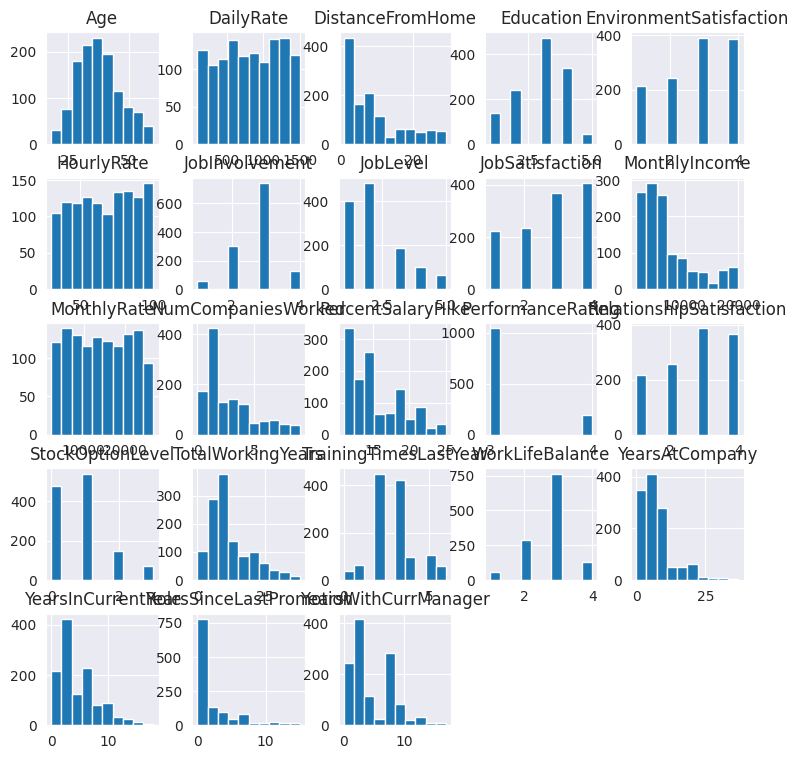

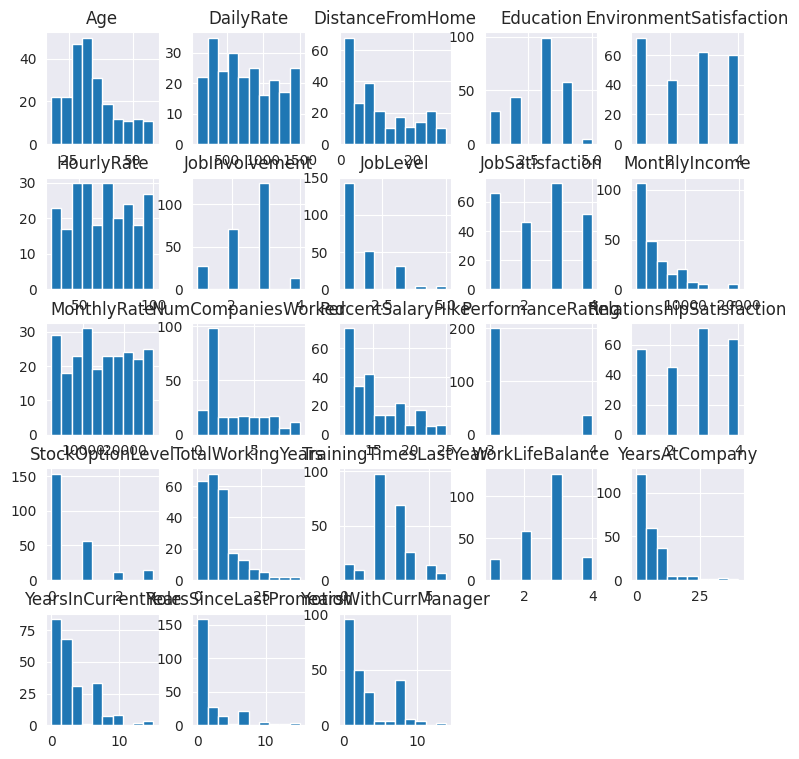

In [ ]:
attrition.groupby('Attrition').hist(figsize=(9,9))

<ipython-input-49-314e88a5eba6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(attrition.corr(),annot=True)


<Axes: >

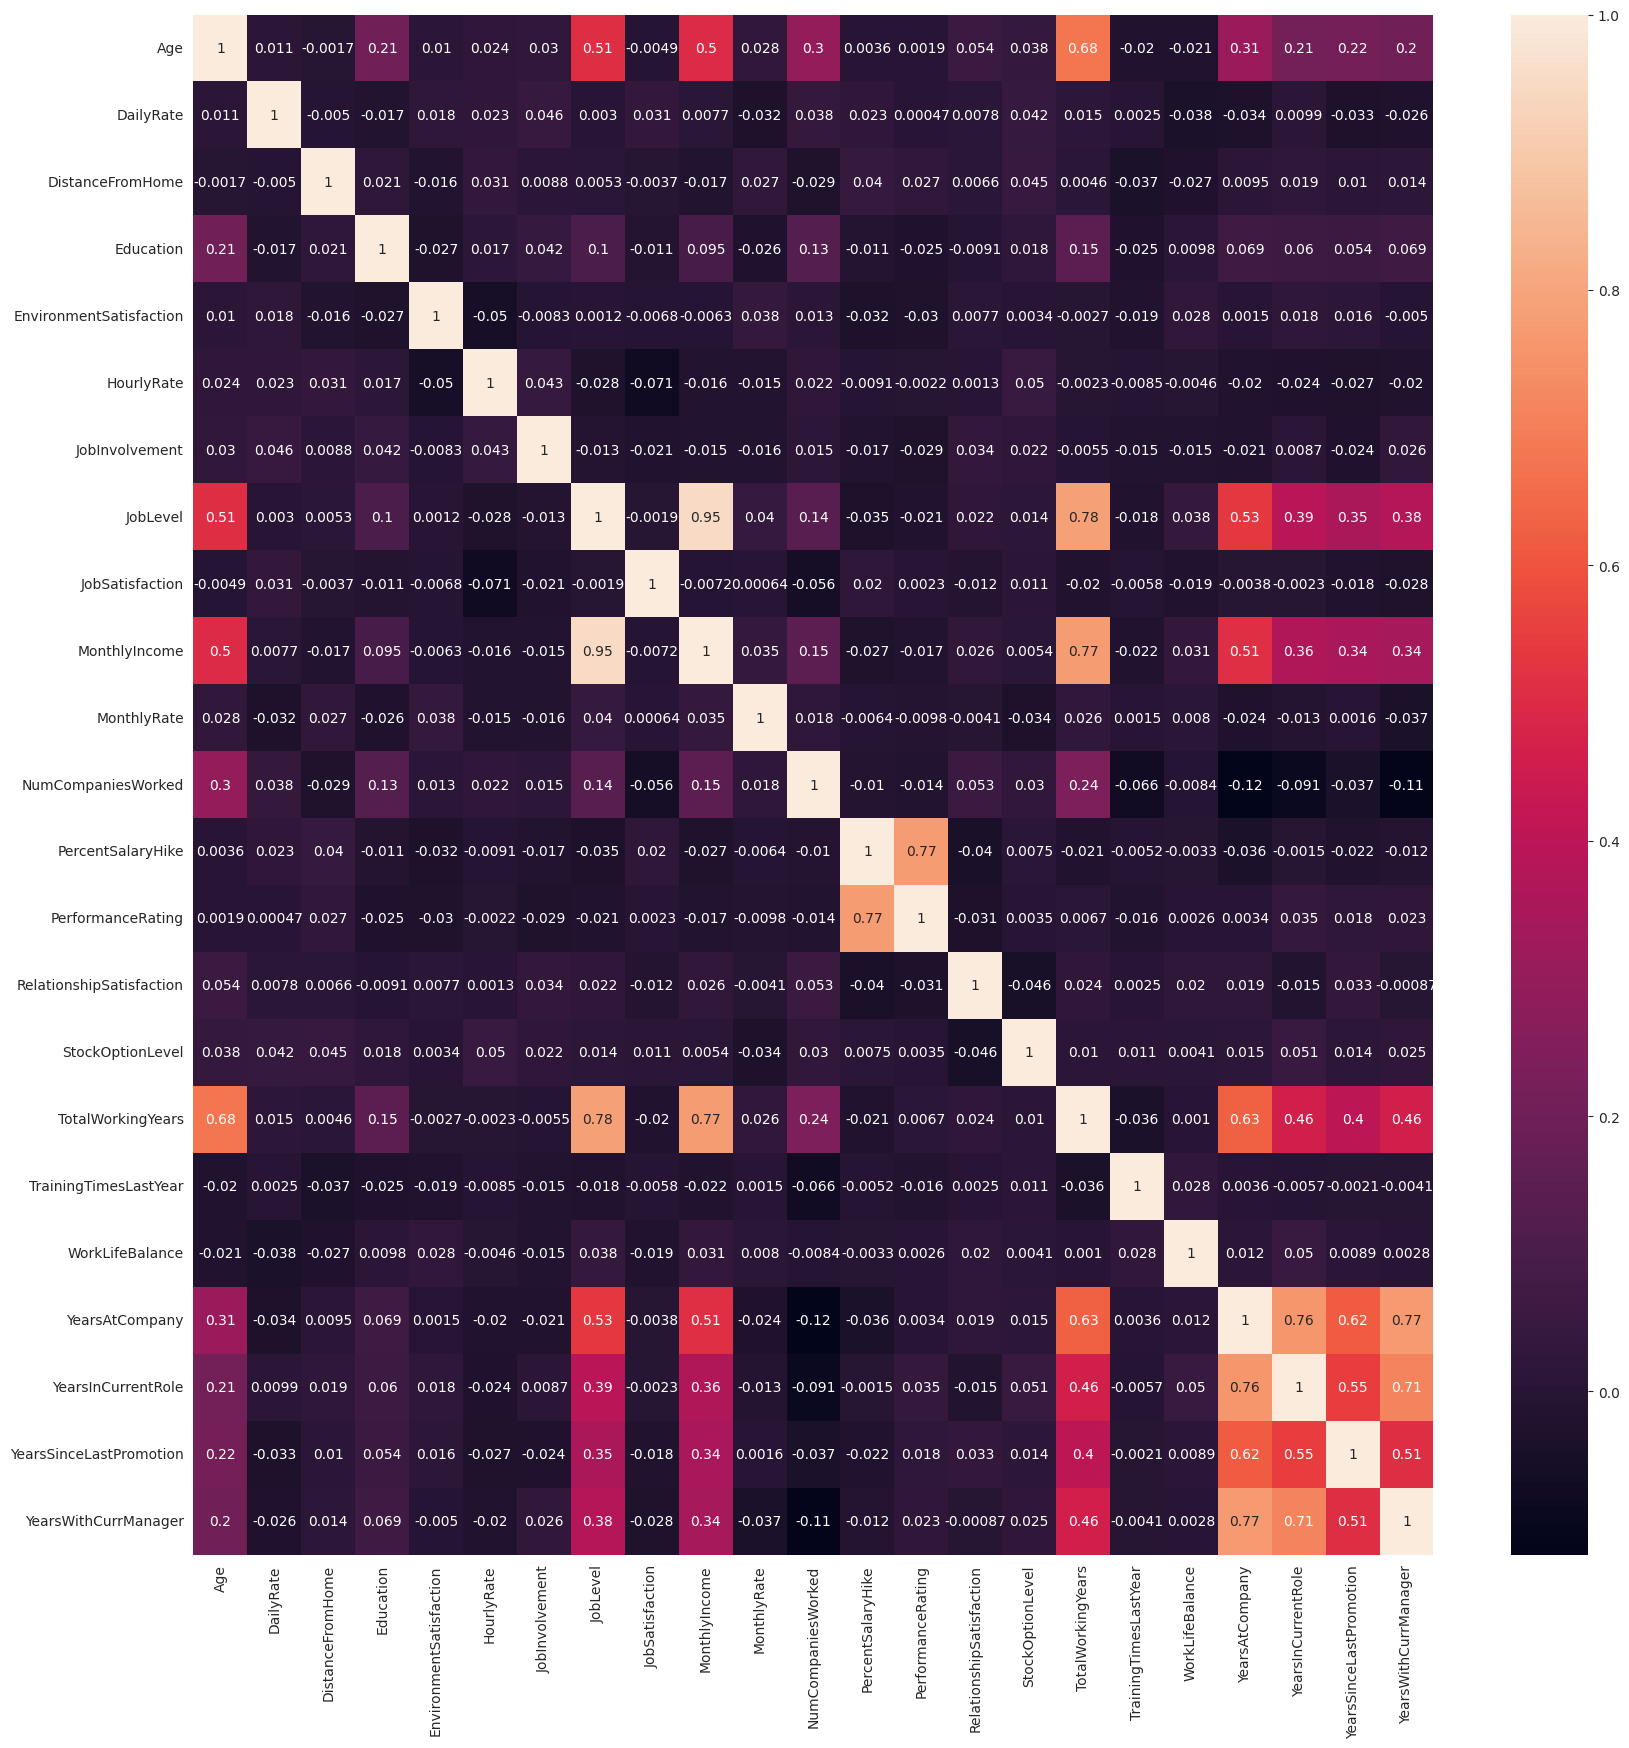

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(attrition.corr(),annot=True)

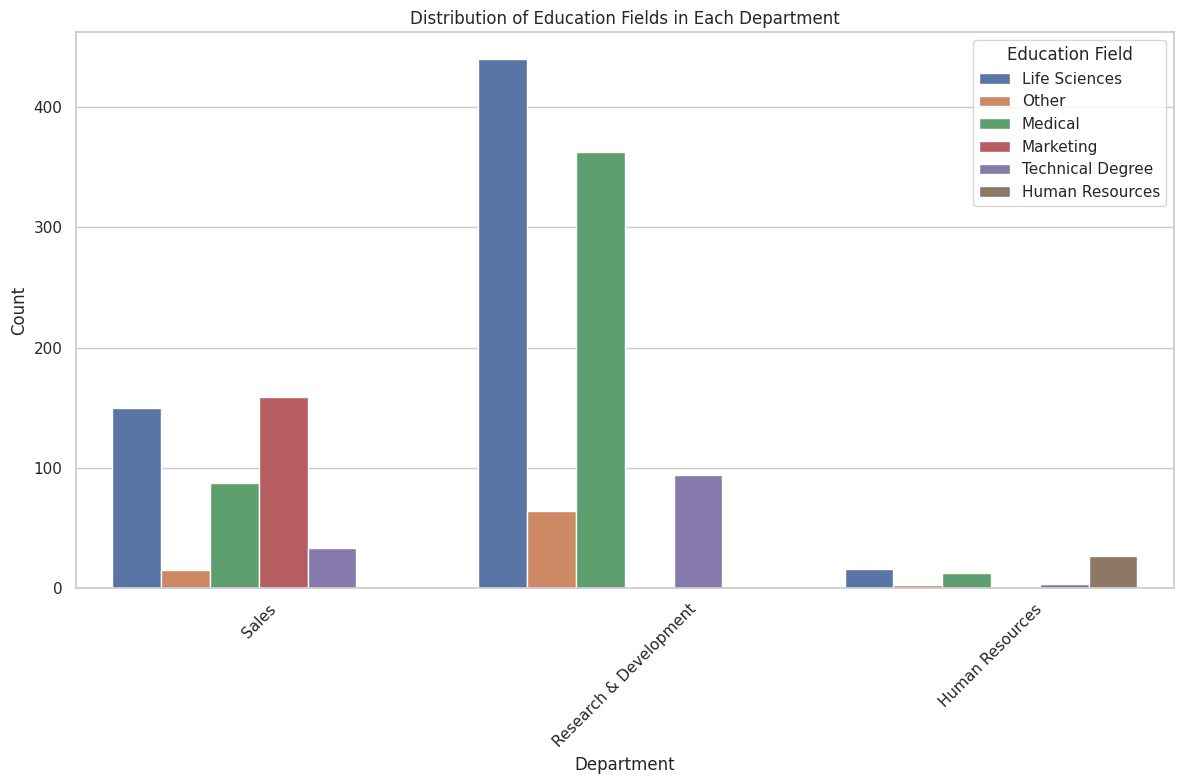

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=attrition, x='Department', hue='EducationField')

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Education Fields in Each Department')

plt.xticks(rotation=45)
plt.legend(title='Education Field')
plt.tight_layout()
plt.show()

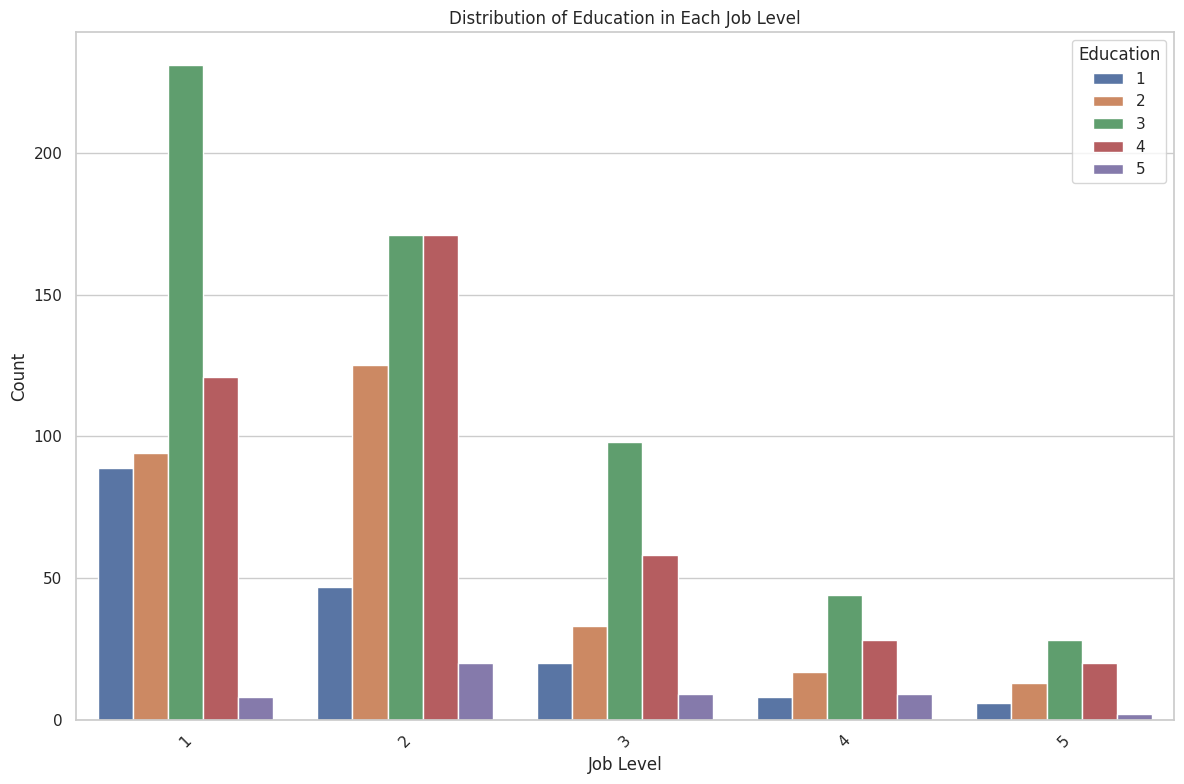

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=attrition, x='JobLevel', hue='Education')

plt.xlabel('Job Level')
plt.ylabel('Count')
plt.title('Distribution of Education in Each Job Level')

plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

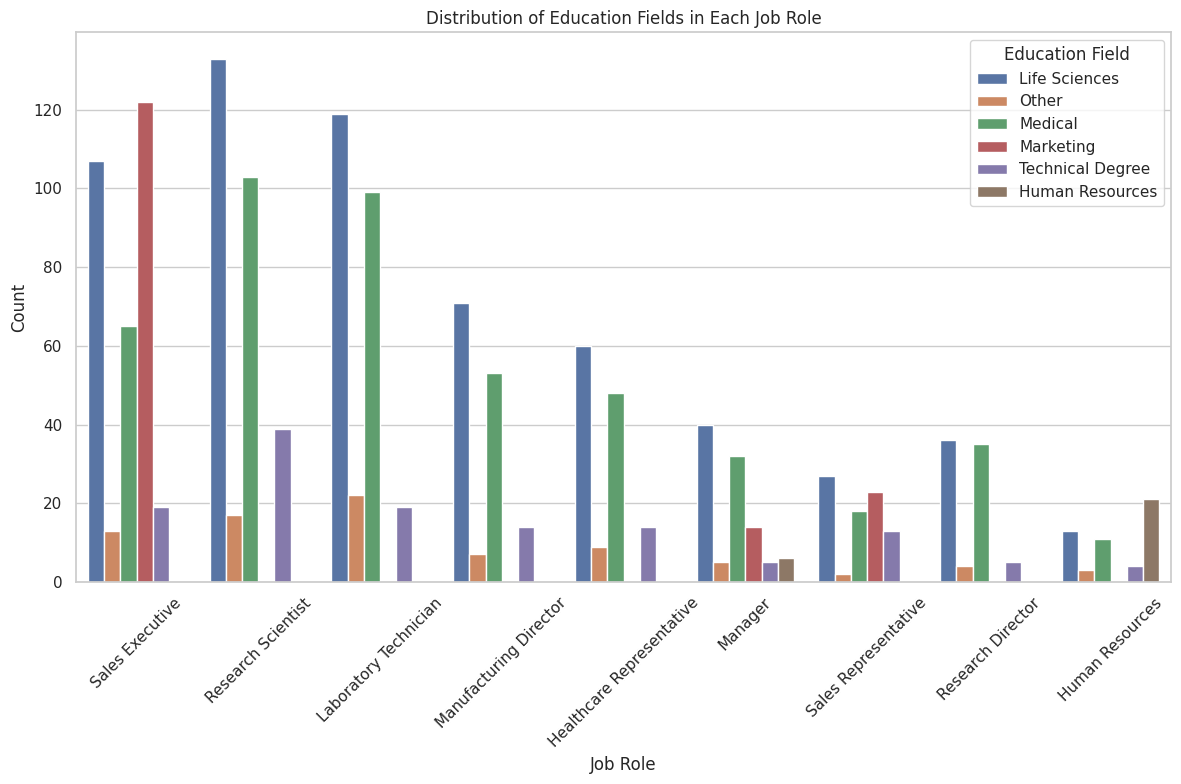

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=attrition, x='JobRole', hue='EducationField')

plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Distribution of Education Fields in Each Job Role')

plt.xticks(rotation=45)
plt.legend(title='Education Field')
plt.tight_layout()
plt.show()

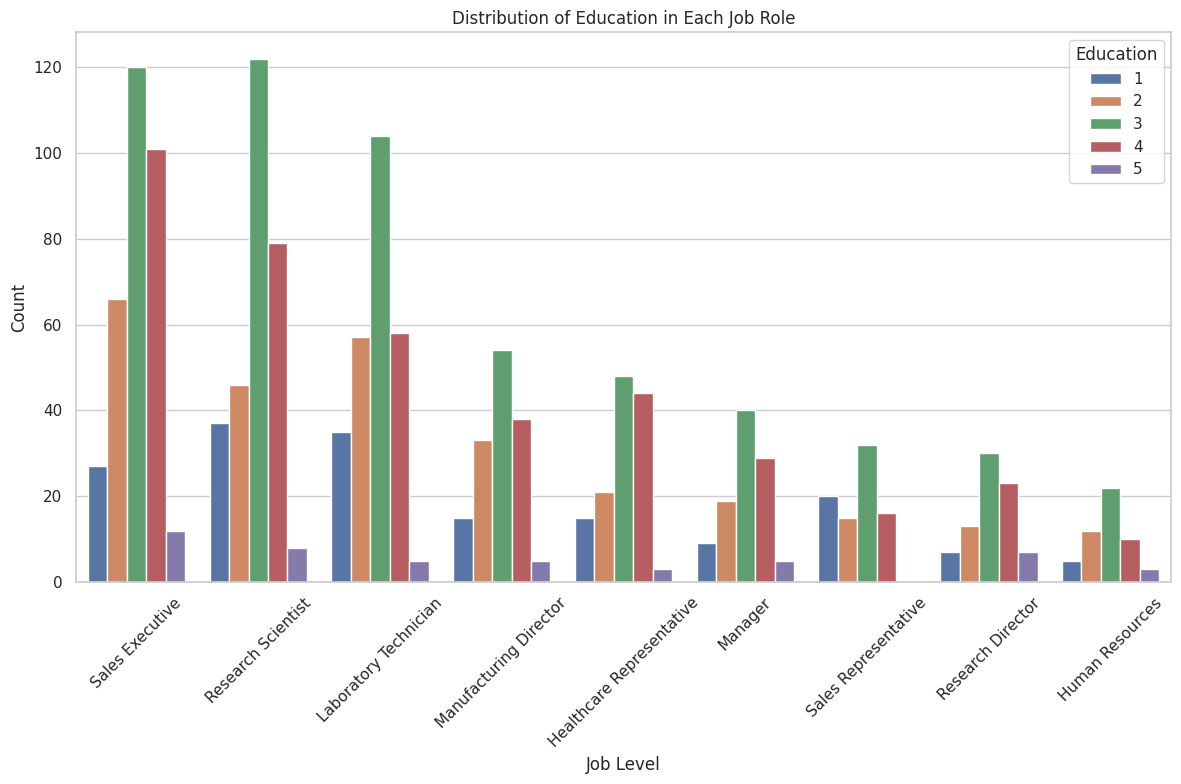

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=attrition, x='JobRole', hue='Education')

plt.xlabel('Job Level')
plt.ylabel('Count')
plt.title('Distribution of Education in Each Job Role')

plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

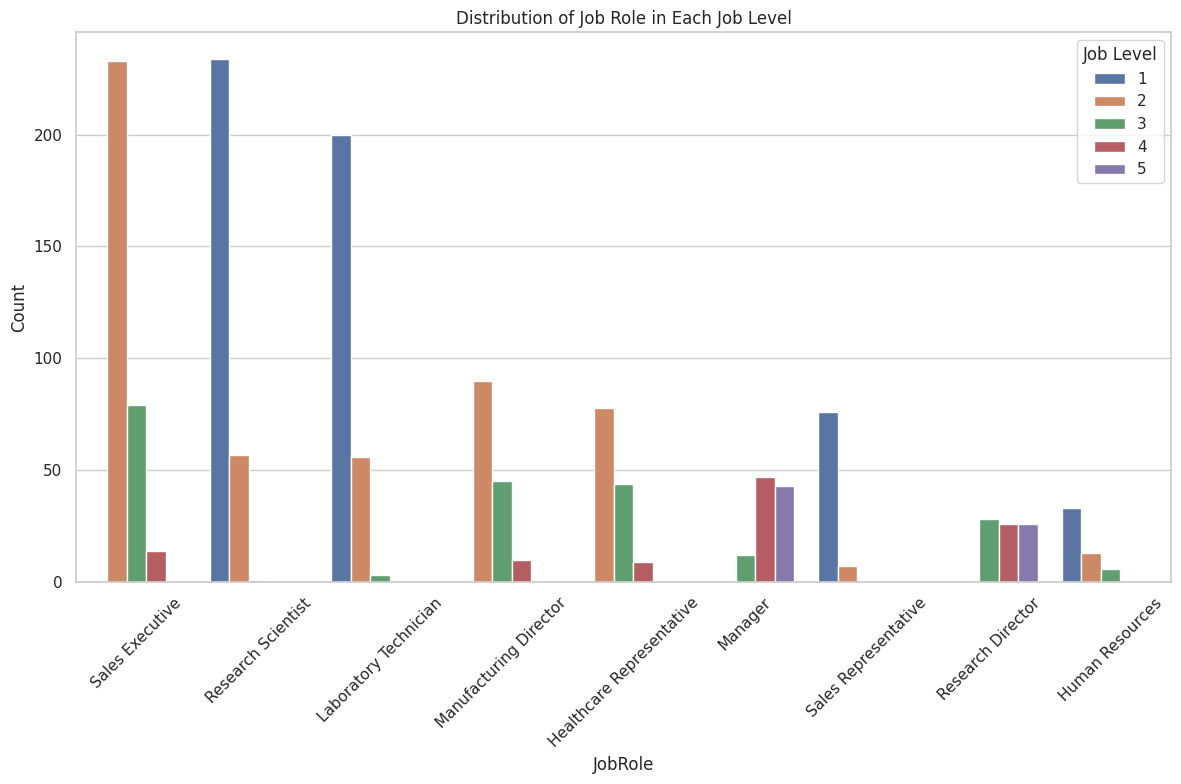

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=attrition, x='JobRole', hue='JobLevel')

plt.xlabel('JobRole')
plt.ylabel('Count')
plt.title('Distribution of Job Role in Each Job Level')

plt.xticks(rotation=45)
plt.legend(title='Job Level')
plt.tight_layout()
plt.show()

In [ ]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
columns_to_drop = ['Age', 'DailyRate', 'Department','DistanceFromHome','Education','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike', 'PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
attrition_mod = attrition.drop(columns=columns_to_drop)

In [ ]:
attrition_mod.columns

Index(['Attrition', 'BusinessTravel', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
attrition_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   EducationField            1470 non-null   object
 3   EnvironmentSatisfaction   1470 non-null   int64 
 4   Gender                    1470 non-null   object
 5   JobInvolvement            1470 non-null   int64 
 6   JobLevel                  1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MaritalStatus             1470 non-null   object
 10  OverTime                  1470 non-null   object
 11  RelationshipSatisfaction  1470 non-null   int64 
 12  StockOptionLevel          1470 non-null   int64 
 13  TrainingTimesLastYear     1470 non-null   int64 
 14  WorkLifeBalance         

In [ ]:
for col in attrition_mod[['BusinessTravel', 'EducationField','Gender',
       'JobRole','MaritalStatus','OverTime']].columns:
  new_df = pd.get_dummies(attrition_mod[col])
  attrition_mod = pd.concat([attrition_mod, new_df], axis=1)
  attrition_mod = attrition_mod.drop([col], axis=1)
  print(attrition_mod.shape)

(1470, 17)
(1470, 22)
(1470, 23)
(1470, 31)
(1470, 33)
(1470, 34)


In [ ]:
attrition_mod.head()

Attrition  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0       Yes                        2               3         2   
1        No                        3               2         2   
2       Yes                        4               2         1   
3        No                        4               3         1   
4        No                        1               3         1   

   JobSatisfaction  RelationshipSatisfaction  StockOptionLevel  \
0                4                         1                 0   
1                2                         4                 1   
2                3                         2                 0   
3                3                         3                 0   
4                2                         4                 1   

   TrainingTimesLastYear  WorkLifeBalance  Non-Travel  ...  \
0                      0                1           0  ...   
1                      3                3           0  ...   
2                      3                3           0  ...   
3                      3                3           0  ...   
4                      3                3           0  ...   

   Manufacturing Director  Research Director  Research Scientist  \
0                       0                  0                   0   
1                       0                  0                   1   
2                       0                  0                   0   
3                       0                  0                   1   
4                       0                  0                   0   

   Sales Executive  Sales Representative  Divorced  Married  Single  No  Yes  
0                1                     0         0        0       1   0    1  
1                0                     0         0        1       0   1    0  
2                0                     0         0        0       1   0    1  
3                0                     0         0        1       0   0    1  
4                0                     0         0        1       0   1    0  

[5 rows x 34 columns]

In [ ]:
# Put into a variable "x" all the values in all but the column "TravelInsurance".
# Put into a variable "y" all the values in the column "TravelInsurance".
# Print out the first 5 rows and shapes of both x and y.

x = attrition_mod.drop('Attrition', axis=1)
y = attrition_mod[['Attrition']]
print(x.head())
print("\n\n")
print(y.head())
print()
print(x.shape)
print(y.shape)

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        2               3         2                4   
1                        3               2         2                2   
2                        4               2         1                3   
3                        4               3         1                3   
4                        1               3         1                2   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                         1                 0                      0   
1                         4                 1                      3   
2                         2                 0                      3   
3                         3                 0                      3   
4                         4                 1                      3   

   WorkLifeBalance  Non-Travel  Travel_Frequently  ...  \
0                1           0                  0  ...   
1           

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
# Import train_test_split and accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score


In [ ]:
# Split the training and testing data

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify = attrition_mod.Attrition, random_state=123)

In [ ]:
# Fit the models and score them

names = []
scores = []
precisions = []
f1 =[]

for name, model in models:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, pos_label='Yes'))
    f1.append(f1_score(y_test, y_pred, pos_label='Yes'))

    names.append(name)

In [ ]:
# Print out "scores", "precisions", "f1" and "names".

print(scores)
print(names)
print(precisions)
print(f1)

[0.8559782608695652, 0.845108695652174, 0.8695652173913043, 0.8070652173913043, 0.7445652173913043, 0.8614130434782609, 0.8858695652173914]
['KNN', 'SVM', 'LR', 'DT', 'GNB', 'RF', 'GB']
[0.6875, 1.0, 0.6896551724137931, 0.4032258064516129, 0.3643410852713178, 0.75, 0.7931034482758621]
[0.29333333333333333, 0.06557377049180328, 0.45454545454545453, 0.4132231404958677, 0.5, 0.32, 0.5227272727272727]


In [ ]:
# Compare the accuracy of the models, sorting the answer in descending order of score.

models_comparison = pd.DataFrame({'Name': names, 'Score': scores,'Precision': precisions,'F1':f1})
models_comparison.sort_values(by='Score', ascending = False, inplace = True)
print(models_comparison)

  Name     Score  Precision        F1
6   GB  0.885870   0.793103  0.522727
2   LR  0.869565   0.689655  0.454545
5   RF  0.861413   0.750000  0.320000
0  KNN  0.855978   0.687500  0.293333
1  SVM  0.845109   1.000000  0.065574
3   DT  0.807065   0.403226  0.413223
4  GNB  0.744565   0.364341  0.500000


In [ ]:
# Print out importances of features of best model

modelChosen = models[-1][1]
modelChosen.feature_importances_

array([0.06348862, 0.09303103, 0.13632129, 0.06616834, 0.05171782,
       0.11266438, 0.04247561, 0.06227851, 0.00646275, 0.02824236,
       0.00378988, 0.01412472, 0.00403199, 0.00696684, 0.00307573,
       0.01400376, 0.01606601, 0.00406507, 0.00041798, 0.        ,
       0.00083623, 0.02125408, 0.00062833, 0.00222956, 0.00253972,
       0.01178887, 0.04868061, 0.03865341, 0.00265684, 0.00392001,
       0.01258662, 0.07970674, 0.04512631])

In [ ]:
# Save all the features in a variable called features

features = attrition_mod.drop('Attrition', axis=1).columns

In [ ]:
# Create a variable features_weight, containing the name of the feature and the corresponding weight
# the best model found above.

features_weight = list(zip(features, modelChosen.feature_importances_))
features_weight

[('EnvironmentSatisfaction', 0.06348862041205226),
 ('JobInvolvement', 0.09303102589489831),
 ('JobLevel', 0.1363212867901803),
 ('JobSatisfaction', 0.06616833822730607),
 ('RelationshipSatisfaction', 0.05171781969204069),
 ('StockOptionLevel', 0.11266438402530965),
 ('TrainingTimesLastYear', 0.04247561376151981),
 ('WorkLifeBalance', 0.062278512381730045),
 ('Non-Travel', 0.006462748245383176),
 ('Travel_Frequently', 0.02824236045036742),
 ('Travel_Rarely', 0.0037898849829624006),
 ('Human Resources', 0.014124721505711185),
 ('Life Sciences', 0.004031991201213165),
 ('Marketing', 0.006966840035003741),
 ('Medical', 0.0030757266478700675),
 ('Other', 0.01400376456214561),
 ('Technical Degree', 0.016066011207073676),
 ('Female', 0.004065068087135368),
 ('Male', 0.00041797566717683695),
 ('Healthcare Representative', 0.0),
 ('Human Resources', 0.0008362340826990724),
 ('Laboratory Technician', 0.02125407616803342),
 ('Manager', 0.0006283322177951614),
 ('Manufacturing Director', 0.002229

In [ ]:
# Select features of weight more than 0.02

selectedFeatures = []

for item in features_weight:
  if item[1] > 0.02:
    selectedFeatures.append(item)

selectedFeatures

[('EnvironmentSatisfaction', 0.06348862041205226),
 ('JobInvolvement', 0.09303102589489831),
 ('JobLevel', 0.1363212867901803),
 ('JobSatisfaction', 0.06616833822730607),
 ('RelationshipSatisfaction', 0.05171781969204069),
 ('StockOptionLevel', 0.11266438402530965),
 ('TrainingTimesLastYear', 0.04247561376151981),
 ('WorkLifeBalance', 0.062278512381730045),
 ('Travel_Frequently', 0.02824236045036742),
 ('Laboratory Technician', 0.02125407616803342),
 ('Sales Executive', 0.04868061029198191),
 ('Sales Representative', 0.03865340769994426),
 ('No', 0.07970673823259694),
 ('Yes', 0.04512630518762834)]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# kfold cross-validation, print outcomes

from sklearn.model_selection import KFold

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123, shuffle=True)
    score = cross_val_score(model, x, y.values.ravel(), cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    precisions.append(precision_score(y_test,y_pred, pos_label= "Yes"))
    f1.append(f1_score(y_test,y_pred, pos_label= "Yes"))

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
kf_cross_val

Name     Score
0  KNN  0.852381
1  SVM  0.849660
2   LR  0.870748
3   DT  0.789116
4  GNB  0.729932
5   RF  0.858503
6   GB  0.861905

In [ ]:
 # sort models by decreasing accuracy

kf_cross_val.sort_values(by='Score', ascending=False)

Name     Score
2   LR  0.870748
6   GB  0.861905
5   RF  0.858503
0  KNN  0.852381
1  SVM  0.849660
3   DT  0.789116
4  GNB  0.729932